In [2]:
import pandas as pd
import matplotlib
matplotlib.__version__

'3.4.3'

Прочитаем средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


Определим, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [4]:
isNan = data.isna().sum()
quantitive_attr = ['age', 'amount', 'duration']
binary_attr = ['telephone', 'foreign_worker', 'credit_risk']
ordinary_attr = ['status', 'savings', 'employment_duration', 'job', 
                 'number_credits', 'people_liable', 'installment_rate', 'present_residence']
categorical_attr = ['credit_history', 'purpose', 'personal_status_sex', 
                   'other_debtors', 'property', 'other_installment_plans', 'housing']
isNan

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Выведим среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
grouped_data = pd.DataFrame([data.groupby(data.purpose).amount.mean()]).transpose()
grouped_data

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
overall_youngers = data.age[data.age < 30].count()
youngers = data.age[data.age < 30][data.housing == 'rent'].count() / overall_youngers

overall_elders = data.age[data.age > 40].count()
elders = data.age[data.age > 40][data.housing == 'rent'].count() / overall_elders

print(f'Percentage of clients, who are younger than 30 and renting house -> {youngers * 100}%', 
     f'Percentage of clients, who are older than 40 and renting house -> {elders * 100}%', sep='\n')


Percentage of clients, who are younger than 30 and renting house -> 66.66666666666666%
Percentage of clients, who are older than 40 and renting house -> 68.01470588235294%


In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построим зеркальные горизонтальные гистограммы.

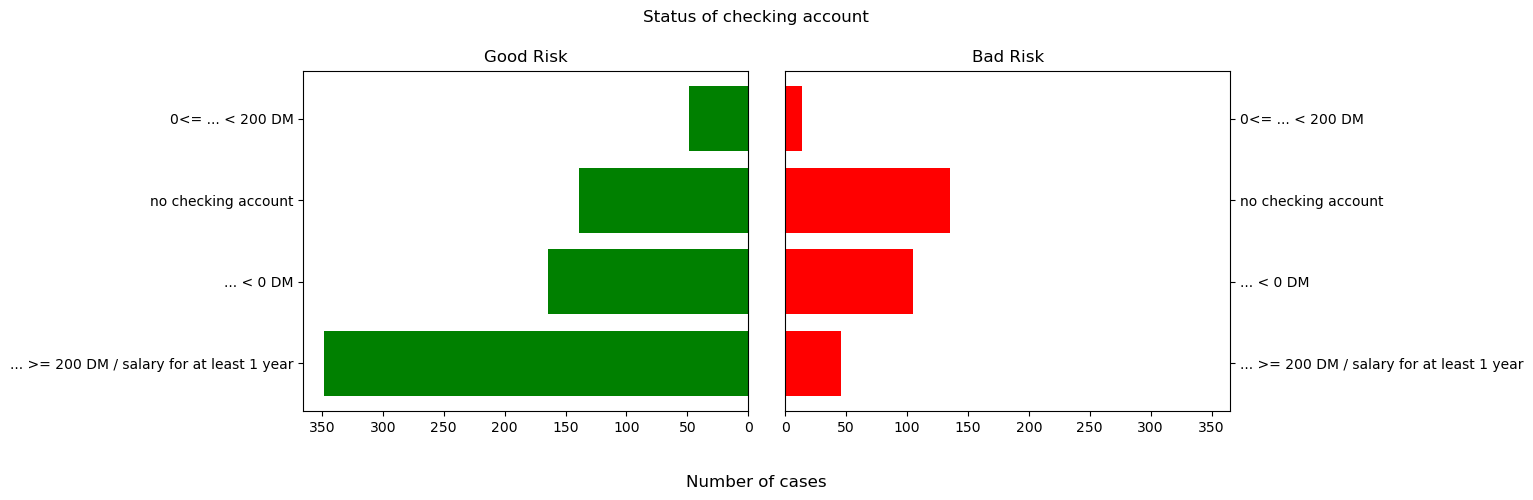

In [11]:
figure, (axes1, axes2) = plt.subplots(figsize=(10,4), ncols=2, sharey=True)
figure.tight_layout()
figure.suptitle('Status of checking account', x=0.5, y=1.1)
figure.supxlabel('Number of cases', y=-0.1)

y_coor_good = data.status[(data.credit_risk == 'good')].value_counts().index
x_coor_good = data.status[(data.credit_risk == 'good')].value_counts()

axes1.barh(y_coor_good, x_coor_good, color='g')
axes1.set_title('Good Risk')
axes1.invert_xaxis()

y_coor_bad = data.status[(data.credit_risk == 'bad')].value_counts().index
x_coor_bad = data.status[(data.credit_risk == 'bad')].value_counts()

axes2.barh(y_coor_bad, x_coor_bad, color='r')
axes2.set_title('Bad Risk')
axes2.set_xbound(axes1.get_xbound())
axes2.yaxis.tick_right()
axes2.yaxis.set_ticks_position('right')

plt.show()

In [13]:
import seaborn as sns

Теперь построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn.

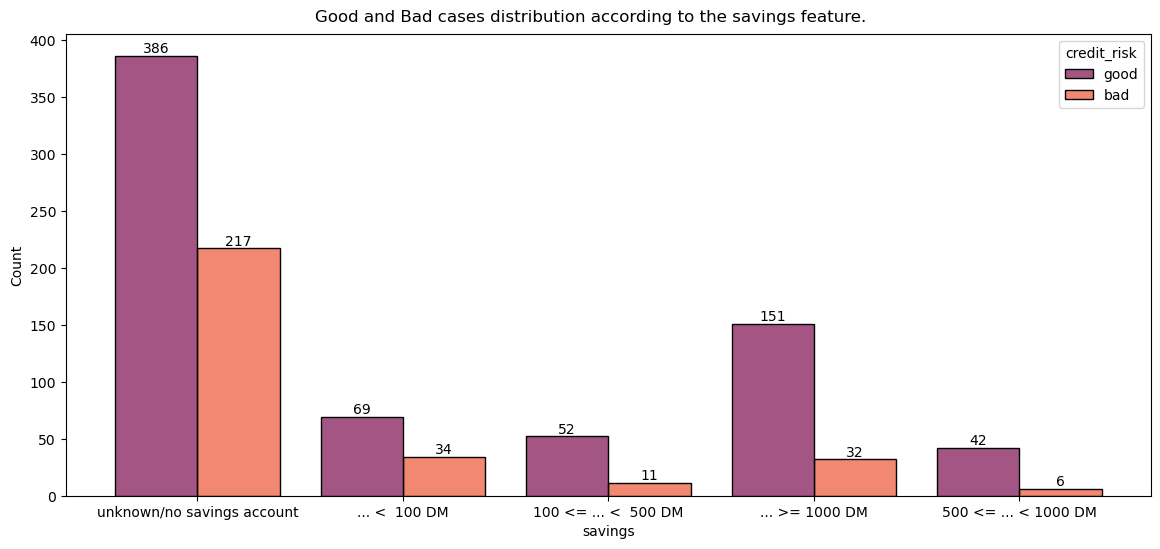

In [14]:
plt.figure(figsize=(14,6))
histogramm = sns.histplot(data=data, x='savings', hue='credit_risk', multiple='dodge', palette='rocket', shrink=0.8)

for i in histogramm.containers:
    histogramm.bar_label(i,)

plt.suptitle('Good and Bad cases distribution according to the savings feature.', y=0.92)
plt.show()

Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Построим подходящую для этого визуализацию.

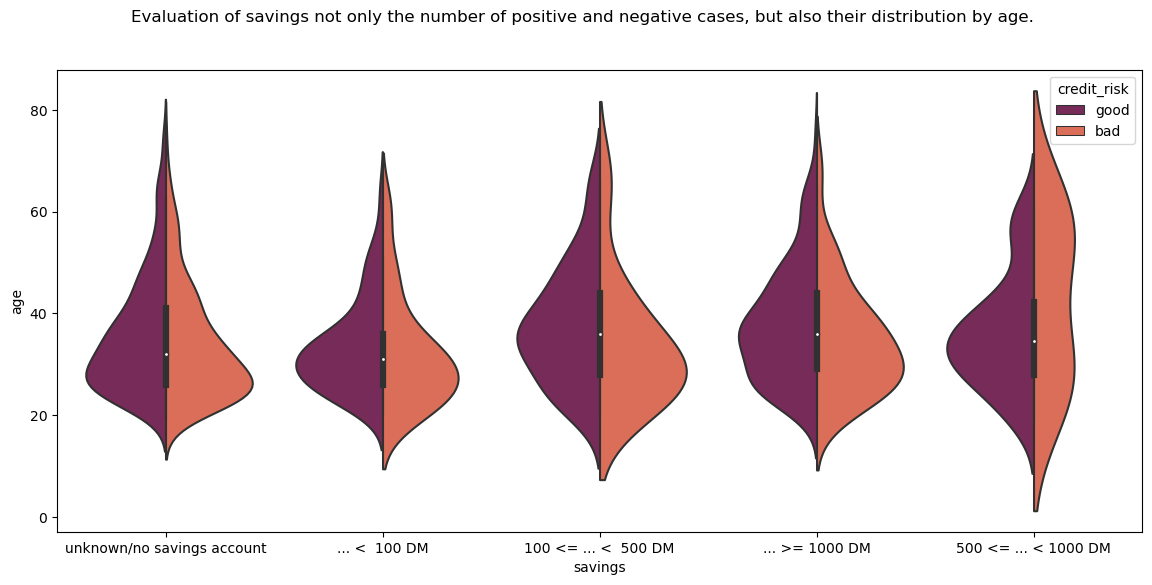

In [18]:
plt.figure(figsize=(14,6))

violin_plot = sns.violinplot(data=data, y='age', x='savings', hue='credit_risk',
                            split=True, palette='rocket')
plt.suptitle('Evaluation of savings not only the number of positive and negative cases, but also their distribution by age.',
            ha='center')
plt.show()

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

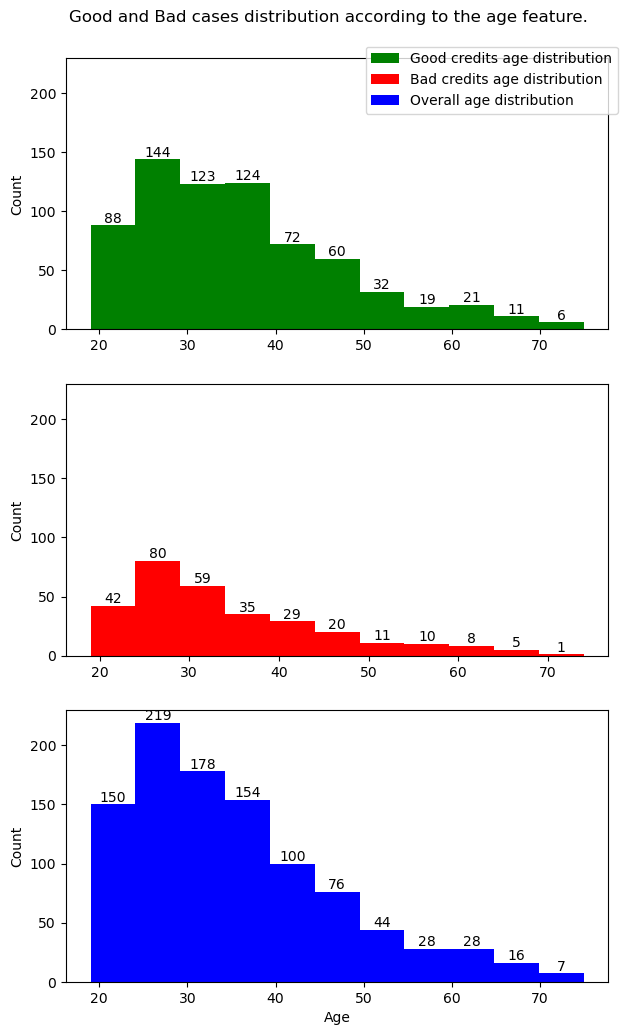

In [17]:
figure, ax = plt.subplots(figsize=(7,12), nrows=3, sharey=True) 

ax[0].hist(x='age', data=data[data.credit_risk == 'good'], color='g', 
                 bins=11, label='Good credits age distribution')  
ax[1].hist(data=data[data.credit_risk == 'bad'], x='age', color='r', 
                 bins=11, label='Bad credits age distribution')
ax[2].hist(data=data, x='age', color='b', 
                 bins=11, label='Overall age distribution')
    
for i in range(len(ax)):
    for j in ax[i].containers:
        ax[i].bar_label(j,)
figure.legend(bbox_to_anchor=(0.923, 0.895))
plt.xlabel('Age')
for i in range(3):
    ax[i].set_ylabel('Count')
    
plt.suptitle('Good and Bad cases distribution according to the age feature.', y=0.92)
plt.show()

# histogramm may not work after running all cells, because after i change values of credit_risk to binary!

Не менее полезной иногда может быть диаграмма рассеяния. Построим такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначим положительные и отрицательные кейсы разными цветами.

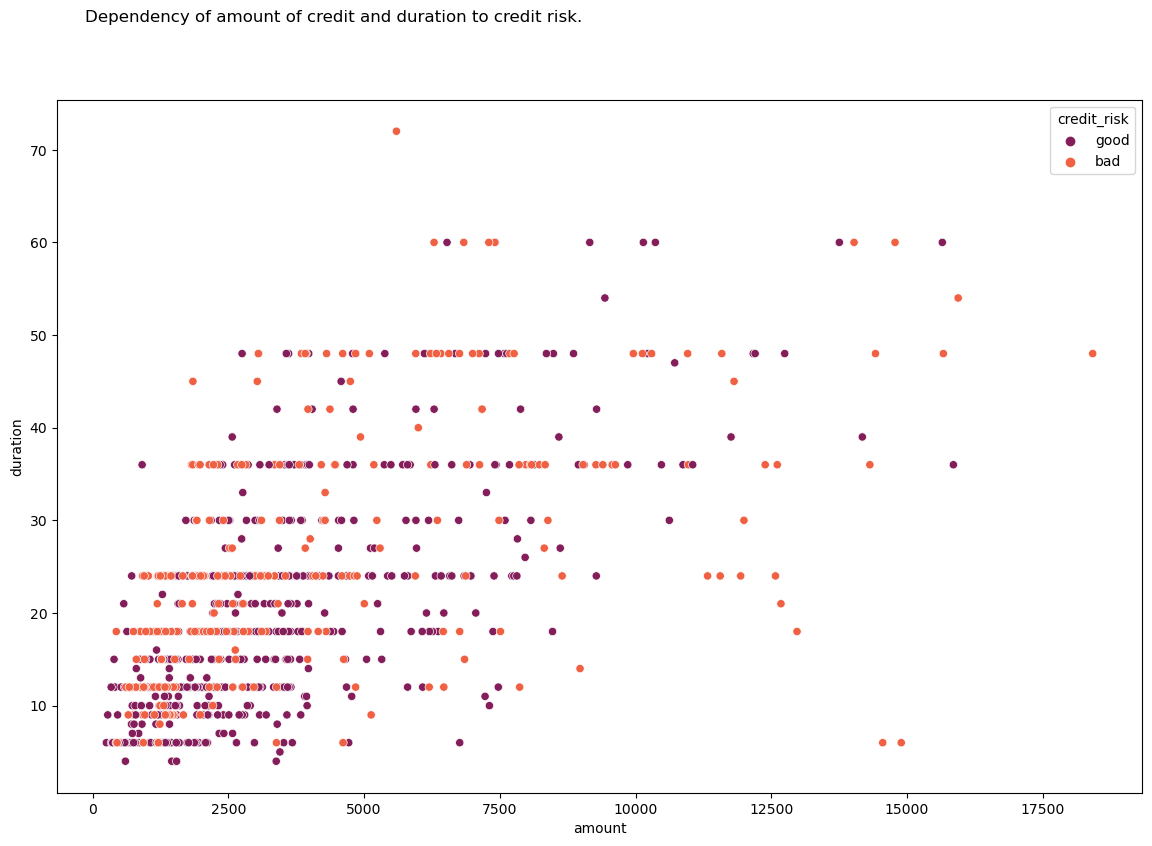

In [19]:
# your code here

plt.figure(figsize=(14,9))

scatter_graph = sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette='rocket')
plt.suptitle('Dependency of amount of credit and duration to credit risk.', ha='right')
plt.show()

Продвинемся глубже. Построим 3D версию диаграммы рассеяния, добавив ось с возрастом.

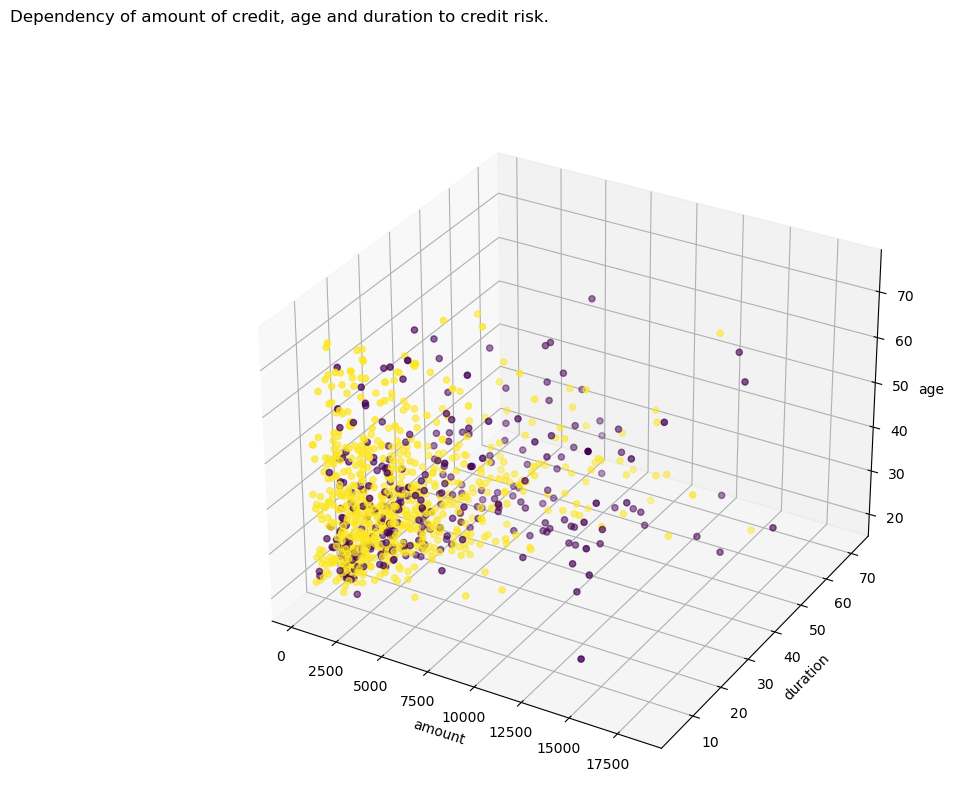

In [21]:
figure_3D = plt.figure(figsize=(14,9))

scatter_garph_3D = figure_3D.add_subplot(111, projection='3d')

x_axis = data.amount
y_axis = data.duration
z_axis = data.age
category = data.credit_risk == 'good'

scatter_garph_3D.set_xlabel('amount')
scatter_garph_3D.set_ylabel('duration')
scatter_garph_3D.set_zlabel('age')

scatter_garph_3D.scatter(x_axis, y_axis, z_axis, c=category, label='Good')
plt.suptitle('Dependency of amount of credit, age and duration to credit risk.', ha='right')

plt.show()

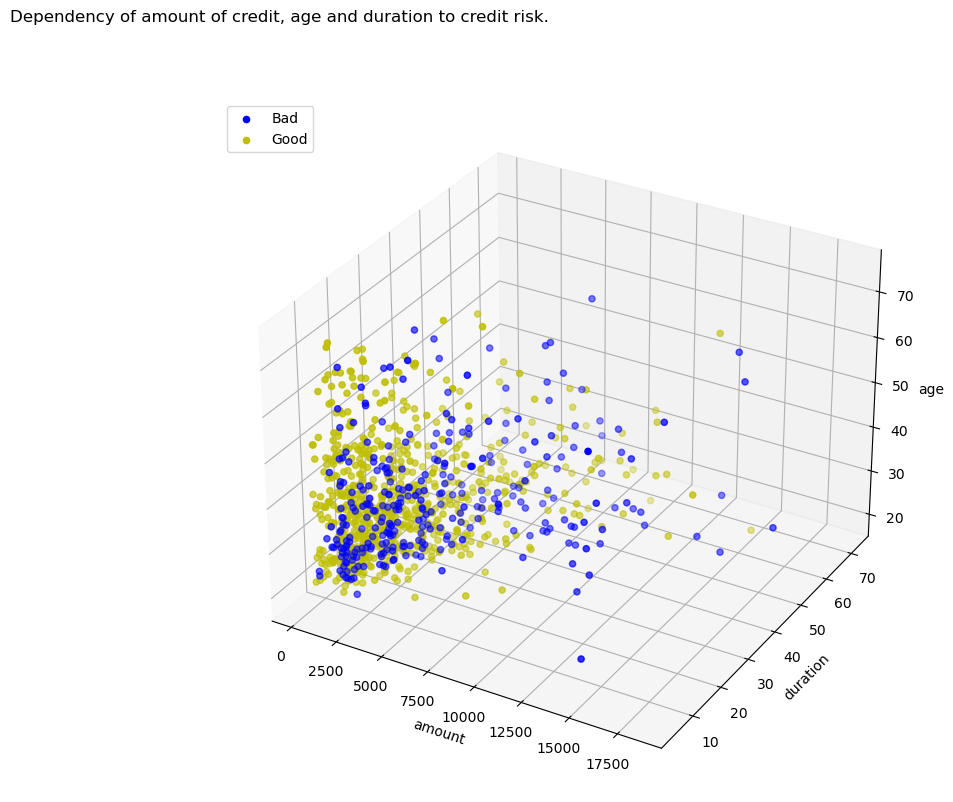

In [22]:
# analog solution with legend -->

figure_3D = plt.figure(figsize=(14,9))
ax = figure_3D.add_subplot(111, projection='3d')

x_axis_good = data[data.credit_risk == 'good'].amount
y_axis_good = data[data.credit_risk == 'good'].duration
z_axis_good = data[data.credit_risk == 'good'].age

x_axis_bad = data[data.credit_risk == 'bad'].amount
y_axis_bad = data[data.credit_risk == 'bad'].duration
z_axis_bad = data[data.credit_risk == 'bad'].age

ax.set_xlabel('amount')
ax.set_ylabel('duration')
ax.set_zlabel('age')

ax.scatter(x_axis_bad, y_axis_bad, z_axis_bad, label='Bad', c='b')
ax.scatter(x_axis_good, y_axis_good, z_axis_good, label='Good', c='y')
plt.suptitle('Dependency of amount of credit, age and duration to credit risk.', ha='right')

plt.legend(loc='upper left')
plt.show()

Представим все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавиммся от категориальных признаков.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

# here I initialized the order of ordinary data, in order to simplify my task to enumerate them from 0 to (n-1)

new_status = ['no checking account', '... < 0 DM', 
              '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year']
new_savings = ['unknown/no savings account', '... <  100 DM',
               '100 <= ... <  500 DM', '500 <= ... < 1000 DM' , '... >= 1000 DM']
new_employment_duration = ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', 
                  '4 <= ... < 7 yrs', '>= 7 yrs']
new_job = ['unemployed/unskilled - non-resident', 'unskilled - resident', 
           'skilled employee/official', 'manager/self-empl./highly qualif. employee']
new_number_credits = ['1', '2-3', '4-5', '>= 6']
new_people_liable = ['0 to 2', '3 or more']
new_installment_rate = ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35']
new_present_residence = ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs']

In [26]:
copy_of_data = pd.DataFrame(data)

# here is a realization, where 
# 'good' credit_risk = 1, (unique condition)
# 'yes' foreign_worker = 1, 
# 'yes (under customer name)' telephone -->

for i in binary_attr:
    if i == 'credit_risk':
        copy_of_data[i] = copy_of_data[i].apply(lambda x: 1 if x == copy_of_data[i].unique()[0] else 0)
    else:
        copy_of_data[i] = copy_of_data[i].apply(lambda x: 1 if x == copy_of_data[i].unique()[1] else 0)

        
# drop all categorical attributes -->

for k in categorical_attr:
    copy_of_data.drop(k, axis='columns', inplace=True)
    
# here is a realization of ordinalEncoding, where i define categories as arrays in aorder to set order
# then i create new columns with encoded categories, without dropping previous columns (in case of safety) -->

ord_encoder = OrdinalEncoder(categories=[new_status, new_savings, new_employment_duration, new_job,
                                        new_number_credits, new_people_liable, new_installment_rate,
                                        new_present_residence])
copy_of_data[['Encoded status', 'Encoded savings', 
            'Encoded employment_duration', 'Encoded job', 
            'Encoded number_credits', 'Encoded people_liable', 'Encoded installment_rate',
            'Encoded present_residence']] = ord_encoder.fit_transform(copy_of_data[['status', 'savings',
                                                                                   'employment_duration',
                                                                                   'job','number_credits',
                                                                                   'people_liable',
                                                                                   'installment_rate',
                                                                                   'present_residence']])

new_data = pd.DataFrame(copy_of_data)
new_data.drop(['status', 'savings', 'employment_duration',  'job','number_credits', 'people_liable', 
               'installment_rate', 'present_residence'], axis=1, inplace=True)
new_data

,duration,amount,age,telephone,foreign_worker,credit_risk,Encoded status,Encoded savings,Encoded employment_duration,Encoded job,Encoded number_credits,Encoded people_liable,Encoded installment_rate,Encoded present_residence
0,18,1049,21,0,0,1,0.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0
1,9,2799,36,0,0,1,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0
2,12,841,23,0,0,1,1.0,1.0,3.0,1.0,0.0,0.0,2.0,3.0
3,12,2122,39,0,1,1,0.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0
4,12,2171,38,0,1,1,0.0,0.0,2.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,0,0,0.0,0.0,2.0,1.0,0.0,1.0,2.0,3.0
996,24,2303,45,0,0,0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0
997,21,12680,30,1,0,0,3.0,4.0,4.0,3.0,0.0,0.0,0.0,3.0
998,12,6468,52,1,0,0,1.0,4.0,0.0,3.0,0.0,0.0,2.0,0.0
